<a href="https://colab.research.google.com/github/CS7140/PA-1/blob/master/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rajesh Sakhamuru

9-12-20

## Comparing Learning Rates in Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Below is the mock data being used:

In [2]:
y_values = np.random.uniform(0,1,100)
y_values

array([0.20976797, 0.66131029, 0.47925126, 0.70110275, 0.61623334,
       0.27724186, 0.54893927, 0.1380137 , 0.4550298 , 0.63460832,
       0.76713349, 0.29287351, 0.33896275, 0.61804607, 0.4103887 ,
       0.79815676, 0.93699007, 0.80057104, 0.86742569, 0.18611302,
       0.02442366, 0.39123224, 0.10133918, 0.09751001, 0.85147343,
       0.89585527, 0.64771396, 0.77241932, 0.67875911, 0.95034431,
       0.87588507, 0.78866135, 0.04532864, 0.95969121, 0.29597985,
       0.43420793, 0.63733491, 0.7053184 , 0.94713498, 0.65618646,
       0.69106431, 0.87910953, 0.56227283, 0.11180593, 0.79100971,
       0.0944198 , 0.08339207, 0.19967393, 0.30199329, 0.07398306,
       0.42838855, 0.26518325, 0.81837086, 0.64938323, 0.58931474,
       0.37352941, 0.64657245, 0.21318394, 0.73404012, 0.39091586,
       0.77058886, 0.89714316, 0.98048728, 0.26543382, 0.00464928,
       0.23296852, 0.5635817 , 0.05121384, 0.01280696, 0.91772925,
       0.32810981, 0.69753416, 0.0679006 , 0.01129447, 0.75812

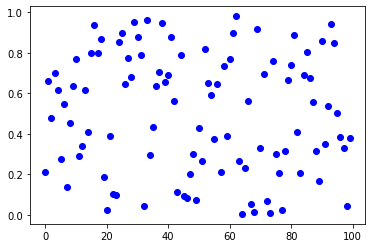

In [3]:
# plot of data generated
plt.plot(y_values, 'bo')
plt.show()

In [4]:
dataSet = pd.DataFrame()
dataSet["x"] = range(1,101)
dataSet["y"] = y_values
dataSet["b"] = 1 # bias
dataSet = dataSet.sample(frac=1).reset_index(drop=True)

dataSet = dataSet[['b','x','y']]
target = 'y'
print(dataSet)

    b   x         y
0   1  23  0.101339
1   1  55  0.589315
2   1  61  0.770589
3   1  71  0.328110
4   1  37  0.637335
.. ..  ..       ...
95  1   3  0.479251
96  1  34  0.959691
97  1  69  0.012807
98  1  26  0.895855
99  1  13  0.338963

[100 rows x 3 columns]


In [5]:
def getColNames(data):
  '''
  Returns list of column names of data given
  :param data: pandas dataframe
  '''
  return list(data.columns)

In [6]:
def calculateSSE(data, target, weightsMatrix):
  '''
  This function can be used to determine 
  the SSE indicating how much error the model has over the data and its 
  predictions.
  '''

  targetCol = data[target].values.tolist()

  testData = data.drop(columns=[target])
  testRowsList = testData.values.tolist()
  SSE = 0

  # calculate squared errors for each row in testing data and sum them for the SSE
  for n in range(len(testRowsList)):
    row = testRowsList[n]
    row = np.array(row)

    prediction = float(np.sum((weightsMatrix.T * row)))
    actual = float(targetCol[n])
    # print(row, "\nprediction:", prediction, "actual:", actual, "  ")

    SSE += (prediction - actual) * (prediction - actual)

  return SSE

In [58]:
def gradientDescent(originalData, target, learningRate, tolerance):
  """
  Uses Stochastic Gradient Descent to create a linear model which reflects training
  """
  data = originalData.copy()
  colNames = getColNames(data)
  allData = np.array(data)

  featList = colNames.copy()
  if target in colNames:
      featList.remove(target)
  
  weights = [[0],[1]]
  weightsMatrix = np.array(weights)

  targetCol = data[target].values.tolist()
  targetMatrix = np.array([[n] for n in targetCol])

  dataMatrix = np.array(data.drop(columns=[target]))

  converged = False
  count = 0

  SSE = calculateSSE(data, target, weightsMatrix)
  priorRMSE = math.sqrt(SSE / len(data))
  RMSEList = [priorRMSE]


  while not converged:
      # calculate gradient
      randomRow = allData[np.random.choice(allData.shape[0], 1, replace=False), :]      
     
      derivIntercept = -2*(randomRow[0][2] - (weightsMatrix[0][0] + weightsMatrix[1][0] * randomRow[0][1]))
      derivSlope = -2*randomRow[0][1] * (randomRow[0][2] - (weightsMatrix[0][0] + weightsMatrix[1][0] * randomRow[0][1]))

      gradient = np.array([[derivIntercept],[derivSlope]])

      newWeights = (weightsMatrix - (learningRate * gradient))
      weightsMatrix = newWeights

      SSE = calculateSSE(data, target, weightsMatrix)
      currentRMSE = math.sqrt(SSE / len(data))

      if (abs(priorRMSE - currentRMSE) < tolerance):
        converged = True

      priorRMSE = currentRMSE
      RMSEList.append(priorRMSE)

      count += 1
      if count >= 200:
        converged = True

  return weightsMatrix, RMSEList

RMSE plot for Stochastic Gradient Descent with high learning rate:

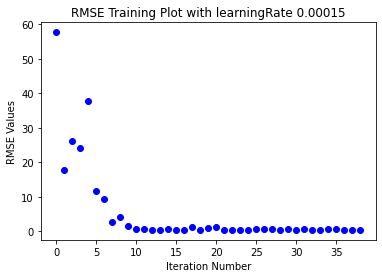

In [91]:
learningRate = 0.00015
tolerance = 0.001

weightsMatrix, RMSEList = gradientDescent(dataSet,target,learningRate,tolerance)

title = "RMSE Training Plot with learningRate 0.00015"
plt.plot(RMSEList, 'bo')
plt.title(title)
plt.ylabel("RMSE Values")
plt.xlabel("Iteration Number")
plt.show()


RMSE plot for Stochastic Gradient Descent with low learning rate:

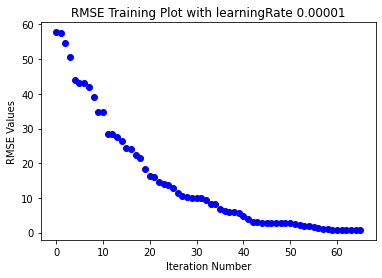

In [90]:
learningRate = 0.00001
tolerance = 0.001

weightsMatrix, RMSEList = gradientDescent(dataSet,target,learningRate,tolerance)

title = "RMSE Training Plot with learningRate 0.00001"
plt.plot(RMSEList, 'bo')
plt.title(title)
plt.ylabel("RMSE Values")
plt.xlabel("Iteration Number")
plt.show()


### Conclusion:
I used two different learning rates for the Stochastic Gradient Descent, 0.00015 and 0.00001 . The error plot for the larger learning rate leads to significantly faster initial convergence and a larger terminal error than does the plot with a lower learning rate. Although the larger learning rate has a larger terminal error range, it is also quite close to 0 and not a bad choice for a faster calculation if that is what is desired.